In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date

In [2]:
df_raw = pd.read_csv('iproperty_rawsample_100pages.csv')

In [3]:
df_raw.head()

,location,area,details,price,date,agent,agency,link,rooms,bathroom,parking
0,"Sunway Mont Residences, Mont Kiara","Mont Kiara, Kuala Lumpur","Condominium | Intermediate • Built-up : 1,12...","RM 1,050,000",Posted today 02:59 AM,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/mont-kia...,2+1,2,2.0
1,"Bennington Residences @ SkyArena, Setapak","Setapak, Kuala Lumpur","Condominium | Corner lot • Built-up : 1,450 ...","RM 680,000",Posted today 02:42 AM,Jo Tan,Maxxan Realty - HQ,https://www.iproperty.com.my/property/setapak/...,4,3,3.0
2,"Sunway Vivaldi, Sri Hartamas","Sri Hartamas, Kuala Lumpur","Condominium | Duplex • Built-up : 3,983 sq. ...","RM 2,700,000",Posted today 02:37 AM,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/sri-hart...,4+1,5,3.0
3,"Sunway Vivaldi, Sri Hartamas","Sri Hartamas, Kuala Lumpur","Condominium | Corner lot • Built-up : 2,573 ...","RM 2,200,000",Posted today 02:33 AM,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/sri-hart...,3+1,5,2.0
4,"The Reach @ Titiwangsa, Setapak","Setapak, Kuala Lumpur","Condominium | Intermediate • Built-up : 1,44...","RM 788,000",Posted today 02:27 AM,Jo Tan,Maxxan Realty - HQ,https://www.iproperty.com.my/property/setapak/...,3,3,2.0


In [4]:
df_model = df_raw.copy()

In [5]:
#formating the date into datetime format
df_model['date'] = df_model['date'].str.replace('Posted ','')
df_model['date'] = df_model['date'].str.replace('today', date.today().strftime('%d %b %Y'))
df_model['date'] = df_model['date'].str.replace('yesterday', (date.today() - datetime.timedelta(days=1)).strftime('%d %b %Y'))
df_model['date'] = df_model['date'].str.replace('on ', '')
df_model['date'] = pd.to_datetime(df_model['date'], format='%d %b %Y %H:%M %p')


In [6]:
#formating the price into int format
try:
    df_model['price'] = df_model['price'].str.replace('RM ', '')
    df_model['price'] = df_model['price'].str.replace(',', '')
    df_model['price'] = df_model['price'].astype(int)
except: pass


In [9]:
df_model[['type','built-up','furnished']]=df_model['details'].str.split('  •  ', expand=True)

In [12]:
df_model['built-up'] = df_model['built-up'].str.replace('Built-up : ', '')
df_model['built-up'] = df_model['built-up'].str.replace(' sq. ft.', '')

C:\Users\Pravin Vijay\AppData\Local\Temp\ipykernel_9040\1373040281.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_model['built-up'] = df_model['built-up'].str.replace(' sq. ft.', '')


In [14]:
df_model['built-up'] = df_model['built-up'].str.replace(',', '')
df_model['built-up'] = df_model['built-up'].astype(int)

In [16]:
df_model['furnished'] = df_model['furnished'].str.replace(' furnished', '')
df_model['furnished'] = df_model['furnished'].str.replace('"', '')

In [18]:
df_model['type'] = df_model['type'].str.replace('"', '')

In [24]:
df_model[['type', 'type-detail']
         ] = df_model['type'].str.split('|', expand=True)

In [26]:
df_model[['area', 'region']
         ] = df_model['area'].str.split(',', expand=True)


In [37]:
df_model['residence']= df_model['location'].str.split(',', expand=True)[0]

In [40]:
df_model[['full-rooms', 'partial-rooms']
         ] = df_model['rooms'].str.split('+', expand=True)

In [46]:
df_model['full-rooms'] = df_model['full-rooms'].str.replace('Studio', '0')


In [48]:
df_model[['full-rooms', 'partial-rooms']
         ] = df_model[['full-rooms', 'partial-rooms']].astype(float)


In [49]:
df_model.head()

,location,area,details,price,date,agent,agency,link,rooms,bathroom,parking,type,built-up,furnished,type-detail,region,residence,full-rooms,partial-rooms
0,"Sunway Mont Residences, Mont Kiara",Mont Kiara,"Condominium | Intermediate • Built-up : 1,12...",1050000,2023-01-14 02:59:00,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/mont-kia...,2+1,2,2.0,Condominium,1122,Fully,Intermediate,Kuala Lumpur,Sunway Mont Residences,2.0,1.0
1,"Bennington Residences @ SkyArena, Setapak",Setapak,"Condominium | Corner lot • Built-up : 1,450 ...",680000,2023-01-14 02:42:00,Jo Tan,Maxxan Realty - HQ,https://www.iproperty.com.my/property/setapak/...,4,3,3.0,Condominium,1450,Partly,Corner lot,Kuala Lumpur,Bennington Residences @ SkyArena,4.0,NaN
2,"Sunway Vivaldi, Sri Hartamas",Sri Hartamas,"Condominium | Duplex • Built-up : 3,983 sq. ...",2700000,2023-01-14 02:37:00,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/sri-hart...,4+1,5,3.0,Condominium,3983,Partly,Duplex,Kuala Lumpur,Sunway Vivaldi,4.0,1.0
3,"Sunway Vivaldi, Sri Hartamas",Sri Hartamas,"Condominium | Corner lot • Built-up : 2,573 ...",2200000,2023-01-14 02:33:00,Melissa Low,IQI Realty Sdn Bhd - Desa Sri Hartamas,https://www.iproperty.com.my/property/sri-hart...,3+1,5,2.0,Condominium,2573,None,Corner lot,Kuala Lumpur,Sunway Vivaldi,3.0,1.0
4,"The Reach @ Titiwangsa, Setapak",Setapak,"Condominium | Intermediate • Built-up : 1,44...",788000,2023-01-14 02:27:00,Jo Tan,Maxxan Realty - HQ,https://www.iproperty.com.my/property/setapak/...,3,3,2.0,Condominium,1440,Fully,Intermediate,Kuala Lumpur,The Reach @ Titiwangsa,3.0,NaN


In [50]:
df_model.describe()

,price,bathroom,parking,built-up,full-rooms,partial-rooms
count,1.594000e+03,1594.000000,1407.000000,1594.000000,1594.000000,851.000000
mean,3.372520e+06,3.689460,2.739872,3059.329360,3.528231,1.237368
std,5.820459e+06,1.951915,1.927342,3869.911276,1.410041,0.684322
min,1.680000e+05,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.960000e+05,2.000000,2.000000,1200.000000,3.000000,1.000000
50%,1.500000e+06,3.000000,2.000000,1830.000000,3.000000,1.000000
75%,3.000000e+06,5.000000,3.000000,3200.000000,4.000000,1.000000
max,4.500000e+07,13.000000,12.000000,36000.000000,12.000000,8.000000


In [44]:
df_model[['full-rooms', 'partial-rooms']
         ].to_csv('rooms_rawsample.csv', index=False)


In [51]:
import matplotlib.pyplot as plt


In [59]:
df_agg=df_model[['area','price']].groupby('area').agg(['mean']).reset_index()
df_agg

,area,price
,,mean
0,Ampang,2.025978e+06
1,Ampang Hilir,4.515000e+06
2,Bandar Damai Perdana,1.242429e+06
3,Bandar Menjalara,8.826153e+05
4,Bangsar,5.460649e+06
5,Batu Caves,5.300000e+05
6,Bukit Bintang,2.535266e+06
7,Bukit Jalil,1.598753e+06
8,Bukit Kiara,5.100000e+06


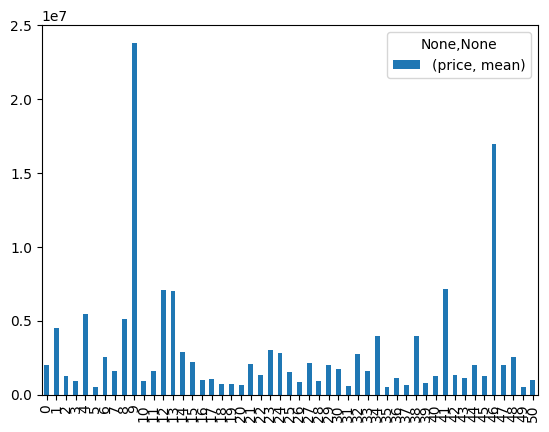

In [60]:
df_agg.plot(kind='bar')
plt.show()
